In [26]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()

In [27]:
#loading data 
rawdata = pd.read_csv('2.01. Admittance.csv')
rawdata

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [33]:
#mapping yes/no to 1/0

data = rawdata.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data.head(10)

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
5,1755,1
6,1775,1
7,1887,1
8,1893,1
9,1580,0


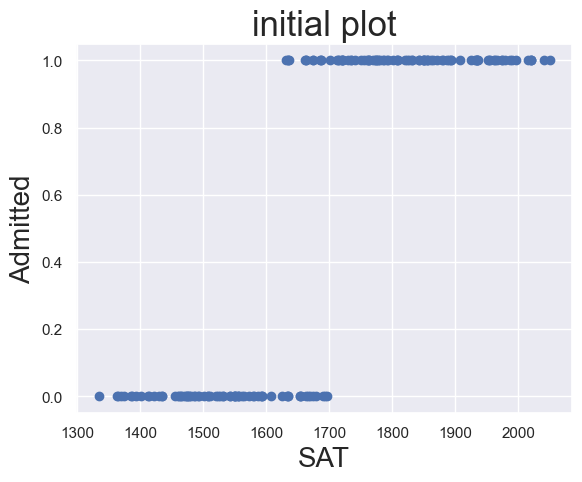

In [36]:
#variables
y = data['Admitted']
x1 = data['SAT']
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.title('initial plot',fontsize=25)
plt.show()

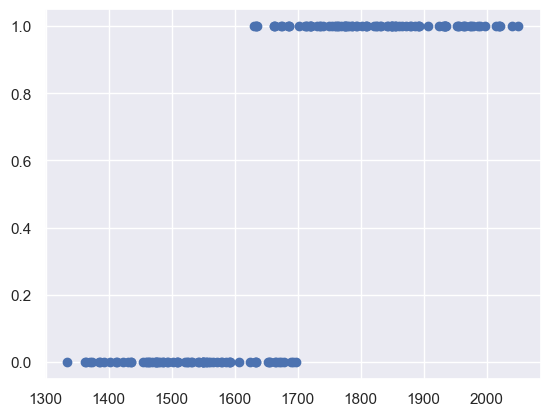

In [40]:
#plot with logistic regression curve 
x = sm.add_constant(x1) # creates a new dataframe with constants column assigned to an "x"

reg_lin = sm.OLS(y,x) # OLS is an "Ordinary Least Squares" method that needs at least two models- our target linear model and the one created via sm.add_constant called "the intercept"
results_lin = reg_lin.fit()
results_lin.summary()




In [46]:
results_lin.params 

const   -3.251859
SAT      0.002248
dtype: float64

In [47]:
y_hat = x1*results_lin.params[1]+results_lin.params[0]
y_hat

C:\Users\flvck\AppData\Local\Temp\ipykernel_15016\873677654.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results_lin.params[1]+results_lin.params[0]


0     -0.187507
1      0.776987
2      1.141202
3      0.464482
4      0.329588
         ...   
163    0.619611
164    0.682561
165    0.244155
166    0.174459
167    0.032820
Name: SAT, Length: 168, dtype: float64

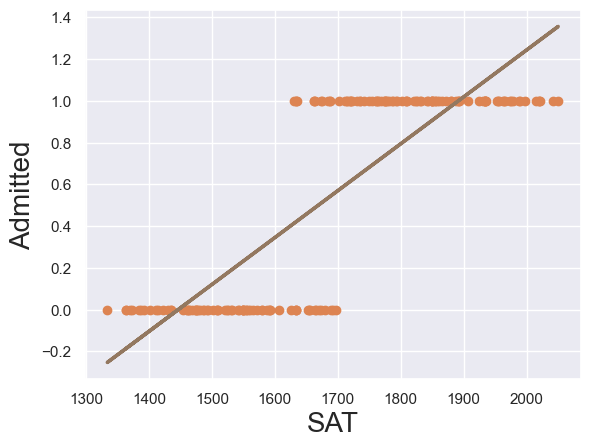

In [55]:
plt.scatter(x1,y,color='C1')

plt.plot(x1,y_hat,lw=2.5,color='C5')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


C:\Users\flvck\AppData\Local\Temp\ipykernel_15016\637546740.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))


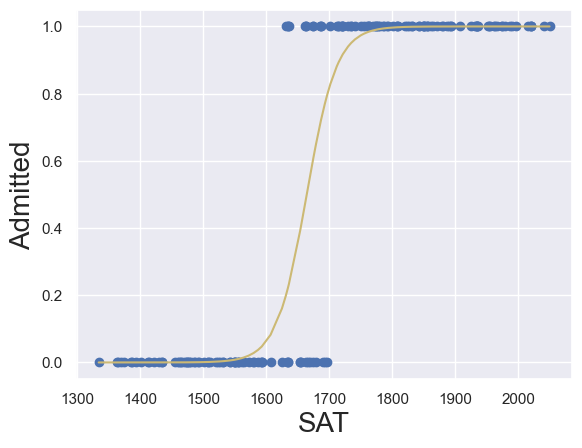

In [59]:
#plot with logistic regression curve

reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()
